<a href="https://colab.research.google.com/github/Kate5-7-2021/Kate_INFO5731_Spring2021/blob/main/Copy_of_INFO5731_Assignment_Four_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/results-final-1.csv')
df.head()

,document_id,clean_text,sentiment
0,0,bwho drtedro resignnl dec wechat group publish...,neutral
1,1,bsenatorhagerti wuhancoronaviru spread world t...,positive
2,2,bjuliensorel chainhomotopi thelogankyl busi xf...,neutral
3,3,bdrmadej i encourag everyon get vaccin necessa...,positive
4,4,bchainhomotopi juliensorel thelogankyl busi xf...,neutral


In [ ]:
!pip install pyLDAvis

In [ ]:
#requir packages
import matplotlib.pyplot as plt

import seaborn as sns
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize,sent_tokenize
from textblob import Word
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
pyLDAvis.enable_notebook()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#cleaning

#remove punctuation
df['clean_text']=df['clean_text'].str.replace('[^\w\s]','')
#remove special characters
df['clean_text']=df['clean_text'].str.replace(r"[^a-zA-Z0-9]", ' ') 
#remove stop words
stop=stopwords.words('english')
df['clean_text']=df['clean_text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
#lowercase
df['clean_text']=df['clean_text'].str.lower()
#stemming
st=PorterStemmer()
df['clean_text']=df['clean_text'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))
#Tokenization
df['clean_text']=df['clean_text'].apply(lambda x:TextBlob(x).words)
#lemmatization
#df['clean_text']=df['clean_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))
#print clean dataframe
df

<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<ipython-input

,document_id,clean_text,sentiment
0,0,"[bwho, drtedro, resignnl, dec, wechat, group, ...",neutral
1,1,"[bsenatorhagerti, wuhancoronaviru, spread, wor...",positive
2,2,"[bjuliensorel, chainhomotopi, thelogankyl, bus...",neutral
3,3,"[bdrmadej, encourag, everyon, get, vaccin, nec...",positive
4,4,"[bchainhomotopi, juliensorel, thelogankyl, bus...",neutral
...,...,...,...
123,123,"[bswami, show, understand, civiliz, issu, here...",neutral
124,124,"[bglobaltimesnew, thatxexx, want, put, ccp, do...",negative
125,125,"[btypediabet, final, ad, massachusettsxexx, li...",positive
126,126,"[btelglobalhealth, sneweyi, good, luck, califo...",negative


In [ ]:
with open("results-final-1.csv", "r", encoding='utf-8') as file:
  results = file.read()

In [ ]:
import pandas
tri_grams=TextBlob(results).ngrams(1)

case1=dict()
for gram in tri_grams:
  gram=tuple(gram)
  case1[gram]=case1.get(gram,0)+1

pandas.DataFrame.from_dict(case1, orient = 'index', columns=['Mono-gram_frequency']).head(100)

,Mono-gram_frequency
"(document_id,)",1
"(clean_text,)",1
"(sentiment,)",1
"(0,)",1
"(bwho,)",2
...,...
"(diseas,)",2
"(mind,)",2
"(plaxexxa,)",2
"(httpstcoikyzxvwxfq,)",2


In [ ]:
import pandas
tri_grams=TextBlob(results).ngrams(2)

case1=dict()
for gram in tri_grams:
  gram=tuple(gram)
  case1[gram]=case1.get(gram,0)+1

pandas.DataFrame.from_dict(case1, orient = 'index', columns=['Di-gram_frequency']).head(100)

,Di-gram_frequency
"(document_id, clean_text)",1
"(clean_text, sentiment)",1
"(sentiment, 0)",1
"(0, bwho)",1
"(bwho, drtedro)",2
...,...
"(ago, now)",2
"(now, told)",2
"(told, ostracizedxexxa)",2
"(ostracizedxexxa, httpstcokyiaqtsxh)",2


In [ ]:
import pandas
tri_grams=TextBlob(results).ngrams(3)

case1=dict()
for gram in tri_grams:
  gram=tuple(gram)
  case1[gram]=case1.get(gram,0)+1

pandas.DataFrame.from_dict(case1, orient = 'index', columns=['Tri-gram_frequency']).head(100)

,Tri-gram_frequency
"(document_id, clean_text, sentiment)",1
"(clean_text, sentiment, 0)",1
"(sentiment, 0, bwho)",1
"(0, bwho, drtedro)",1
"(bwho, drtedro, resignnl)",2
...,...
"(one, year, ago)",2
"(year, ago, now)",2
"(ago, now, told)",2
"(now, told, ostracizedxexxa)",2


In [ ]:
#ngram_list=pandas.values.tolist()

In [ ]:
#res = sorted(ngram_list, key = lambda x: x[1], reverse = True)[:10]
#print("The top N records are : " + str(res))

In [ ]:
tweets=df['clean_text'].tolist()

In [ ]:
dictionary=corpora.Dictionary(tweets)                                 #Apply LDA model
corpus = [dictionary.doc2bow(text) for text in tweets]
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=100)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
for topic in ldamodel.print_topics(num_topics=10, num_words=10):
  print(topic)

(0, '0.026*"wuhancoronaviru" + 0.021*"perfect" + 0.021*"told" + 0.021*"busi" + 0.021*"bjuliensorel" + 0.021*"one" + 0.021*"thelogankyl" + 0.021*"chainhomotopi" + 0.021*"guy" + 0.011*"want"')
(1, '0.059*"china" + 0.041*"wuhancoronaviru" + 0.030*"bglobaltimesnew" + 0.018*"hope" + 0.018*"good" + 0.012*"sure" + 0.012*"claim" + 0.012*"countri" + 0.012*"sarscov" + 0.012*"vaccin"')
(2, '0.072*"ccp" + 0.067*"wuhancoronaviru" + 0.052*"thank" + 0.050*"spread" + 0.050*"help" + 0.049*"world" + 0.016*"toxexxa" + 0.012*"conceaxexxa" + 0.012*"vaccin" + 0.008*"u"')
(3, '0.062*"ccp" + 0.046*"wuhancoronaviru" + 0.027*"world" + 0.027*"spread" + 0.027*"help" + 0.027*"thank" + 0.020*"concealmexexxa" + 0.013*"byahoonew" + 0.013*"call" + 0.013*"httpstcoojptkobm"')
(4, '0.034*"china" + 0.021*"bglobaltimesnew" + 0.014*"whoxexxa" + 0.014*"sarslik" + 0.014*"resignnl" + 0.014*"wechat" + 0.014*"virusnjan" + 0.014*"tell" + 0.014*"bwho" + 0.014*"publish"')
(5, '0.019*"world" + 0.017*"sourc" + 0.017*"bthesun" + 0.017

# **Top 10 Topics Description**

Topic1: Uncertain vaccine safety

Topic2: Withhelding data clearly based on new global time

Topic3: Related to the vaccine in China and countries

Topic4: Spreed virus in china

Topic5: Related to Sarscov virus found in China

Topic6: Related to China

Topic7: Coronavirus and global population 

Topic8: Coronavirus world spread related

Topic9: Frredom and democracy and the consequence of rule

Topic10:Diabet type and medicine

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

# **Part (1) answer:**

In this part of the assignment, as preprocessing steps are initial steps in sentiment analysis preprocessing features from nltk packages are used for cleaning and preparing data. The tfidf is used as part of classification because the performance of that is suitable for data with high frequency of words such as Twitter data that usually have repeated words. Accuracy, recall, precision, f1_score and cross validation are for evaluating the model amoung other models and choose the best model with high performance.

# **Part (2) answer:**

In [ ]:
#packages
import operator
import numpy as np
import csv
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#from collections import Counter

In [ ]:
file=open('/content/results-final-1.csv','r')               #to read the text file
df=pd.read_csv(file)
df


,document_id,clean_text,sentiment
0,0,bwho drtedro resignnl dec wechat group publish...,neutral
1,1,bsenatorhagerti wuhancoronaviru spread world t...,positive
2,2,bjuliensorel chainhomotopi thelogankyl busi xf...,neutral
3,3,bdrmadej i encourag everyon get vaccin necessa...,positive
4,4,bchainhomotopi juliensorel thelogankyl busi xf...,neutral
...,...,...,...
123,123,bswami you show understand civiliz issu herenn...,neutral
124,124,bglobaltimesnew thatxexx want put ccp dog cage...,negative
125,125,btypediabet final ad massachusettsxexx list el...,positive
126,126,btelglobalhealth sneweyi good luck california ...,negative


In [ ]:
df.shape

(128, 3)

In [ ]:
#cleaning
df['clean_text']=df['clean_text'].str.lower()
df['clean_text']=df['clean_text'].str.replace('[^\w\s]','') 
df['clean_text']=df['clean_text'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))   
stop=stopwords.words('english')
df['clean_text']=df['clean_text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
               

<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-34-49111476185f>:3: DeprecationWarning: invalid escape sequence \w
  df['clean_text']=df['clean_text'].str.replace('[^\w\s]','')
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#sns.factorplot(x="sentiment", data=df, kind="count", size=6, aspect=1.5, palette=sns.color_palette('coolwarm', n_colors=3), 
                  #legend="brief")
#plt.show();


In [ ]:
tfidf_vect= TfidfVectorizer(analyzer='word')   
tfidf_vect.fit(df['clean_text'])
xtfidf=tfidf_vect.transform(df['clean_text'])

In [ ]:
y=df['sentiment']
x_train, x_test, y_train, y_test=train_test_split(xtfidf,y.values, test_size=0.2, random_state=0)

In [ ]:
x_train.shape, y_train.shape

((102, 529), (102,))

In [ ]:
x_test.shape, y_test.shape

((26, 529), (26,))

In [ ]:
#MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
print('NaiveBayes Score: %.3f' % nb_model.score(x_test,y_test))

NaiveBayes Score: 0.692


In [ ]:
#def get_metrics(predictions, df_test_y):
  #accuracy = metrics.accuracy_score(predictions, df_test_y)
  #precision = metrics.precision_score(predictions, df_test_y, pos_label='positive', average='micro')
  #recall = metrics.recall_score(predictions, df_test_y, pos_label='positive', average='micro')
  #f1 = metrics.f1_score(predictions, df_test_y, pos_label='positive', average='micro')
  #return accuracy, precision, recall, f1

In [ ]:
predictions = nb_model.predict(x_test)
predictions

array(['negative', 'positive', 'neutral', 'negative', 'neutral',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative'], dtype='<U8')

In [ ]:
print('Predicted:', [y for y in predictions])
print('Anotated:', [y for y in y_test])


Predicted: ['negative', 'positive', 'neutral', 'negative', 'neutral', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative']
Anotated: ['positive', 'positive', 'neutral', 'negative', 'neutral', 'positive', 'negative', 'positive', 'neutral', 'positive', 'negative', 'negative', 'neutral', 'positive', 'positive', 'negative', 'neutral', 'neutral', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive']


In [ ]:
#plt.scatter(y_test, predictions)
#plt.xlabel('Anotatations')
#plt.ylabel('Predeictions')

In [ ]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy = accuracy_score(y_test, predictions) * 100
recall = recall_score (y_test, predictions, average='macro') *100
precision = precision_score(y_test, predictions, average='macro') *100
f1 = f1_score(y_test, predictions, average='macro') *100
print('Accuracy:', accuracy)
print('recall:', recall)
print('Precision:', precision)
print('F1-score:', f1)



Accuracy: 69.23076923076923
recall: 64.98316498316498
Precision: 80.74074074074073
F1-score: 65.55555555555556


In [ ]:
nb_cross_valid_scores=cross_val_score(nb_model,xtfidf,y.values,cv=10)
nb_cross_valid_scores

array([0.61538462, 0.92307692, 0.84615385, 0.84615385, 0.46153846,
       0.53846154, 0.69230769, 0.92307692, 0.91666667, 0.91666667])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (nb_cross_valid_scores.mean(), nb_cross_valid_scores.std()))

0.77 accuracy with a standard deviation of 0.17


In [ ]:
#nb_cross_valid_scores=cross_val_score(nb_model,x_test,y_test,cv=10)
#nb_cross_valid_scores

In [ ]:
#print("%0.2f accuracy with a standard deviation of %0.2f" % (nb_cross_valid_scores.mean(), nb_cross_valid_scores.std()))

In [ ]:
#SVM Model
sc=StandardScaler(with_mean=False)
sc.fit_transform(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [ ]:
svm_model=svm.SVC(kernel='linear',C=1).fit(x_train_std,y_train)  # increasing the number of C will decrease the svm score
print('SVM Score: %.3f' % svm_model.score(x_test_std,y_test))

SVM Score: 0.731


In [ ]:
predictions_svm = svm_model.predict(x_test)
predictions_svm

array(['negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative'], dtype=object)

In [ ]:
print('Predicted:', [y for y in predictions_svm])
print('Anotated:', [y for y in y_test])

Predicted: ['negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative']
Anotated: ['positive', 'positive', 'neutral', 'negative', 'neutral', 'positive', 'negative', 'positive', 'neutral', 'positive', 'negative', 'negative', 'neutral', 'positive', 'positive', 'negative', 'neutral', 'neutral', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive']


In [ ]:
accuracy = accuracy_score(y_test, predictions_svm) * 100
recall = recall_score (y_test, predictions_svm, average='macro') *100
precision = precision_score(y_test, predictions_svm, average='macro') *100
f1 = f1_score(y_test, predictions_svm, average='macro') *100
print('Accuracy:', accuracy)
print('recall:', recall)
print('Precision:', precision)
print('F1-score:', f1)

Accuracy: 50.0
recall: 45.45454545454546
Precision: 46.96969696969697
F1-score: 37.1326164874552


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm_cross_valid_scores=cross_val_score(svm_model,xtfidf,y.values,cv=10)
svm_cross_valid_scores

array([0.61538462, 0.92307692, 0.84615385, 0.84615385, 0.53846154,
       0.53846154, 0.76923077, 0.92307692, 0.83333333, 0.91666667])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (svm_cross_valid_scores.mean(), svm_cross_valid_scores.std()))

0.78 accuracy with a standard deviation of 0.15


In [ ]:
#Logistic Regression Model
logist_model = LogisticRegression()
logist_model.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions_lr = logist_model.predict(x_test)
predictions_lr

array(['negative', 'positive', 'neutral', 'negative', 'neutral',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative'], dtype=object)

In [ ]:
print('Predicted:', [y for y in predictions_lr])
print('Anotated:', [y for y in y_test])

Predicted: ['negative', 'positive', 'neutral', 'negative', 'neutral', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative']
Anotated: ['positive', 'positive', 'neutral', 'negative', 'neutral', 'positive', 'negative', 'positive', 'neutral', 'positive', 'negative', 'negative', 'neutral', 'positive', 'positive', 'negative', 'neutral', 'neutral', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive']


In [ ]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy = accuracy_score(y_test, predictions_lr) * 100
recall = recall_score (y_test, predictions_lr, average='macro') *100
precision = precision_score(y_test, predictions_lr, average='macro') *100
f1 = f1_score(y_test, predictions_lr, average='macro') *100
print('Accuracy:', accuracy)
print('recall:', recall)
print('Precision:', precision)
print('F1-score:', f1)


Accuracy: 73.07692307692307
recall: 68.68686868686868
Precision: 85.41666666666666
F1-score: 68.73684210526316


In [ ]:
logist_cross_valid_scores=cross_val_score(logist_model,xtfidf,y.values,cv=10)
logist_cross_valid_scores

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

array([0.61538462, 0.92307692, 0.84615385, 0.84615385, 0.53846154,
       0.53846154, 0.76923077, 0.92307692, 0.83333333, 0.91666667])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (logist_cross_valid_scores.mean(), logist_cross_valid_scores.std()))

0.78 accuracy with a standard deviation of 0.15


#**Part (3): Models' Comparison**

The first two models are MultinomialNB and SVM. Between these two models SVM has very poor performance with accuracy of 50.00, precision of 46.97 and F1-score of 37.13; however, the MultinomialNB model has good performance with this data set which has the result of 69.23 accuracy, 80.74 precision and 65.56 F1-score. In addition, I tested the performance of the logistic regression which usually shows good performance with dataset like my dataset. After applying the logistic regression, it is proved the it would be better training model for my dataset because of the valuable accuracy(73.08), precision(85.42)and F1-score(68.74).

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an example for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
df_train=pd.read_csv('/content/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_test=pd.read_csv('/content/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_test.shape

(1459, 80)

In [6]:
df_train_describe=df_train.describe() 
df_train_describe           # the summary statistics of train data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_test_describe=df_test.describe()
df_test_describe                        # the summary statistics of test data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


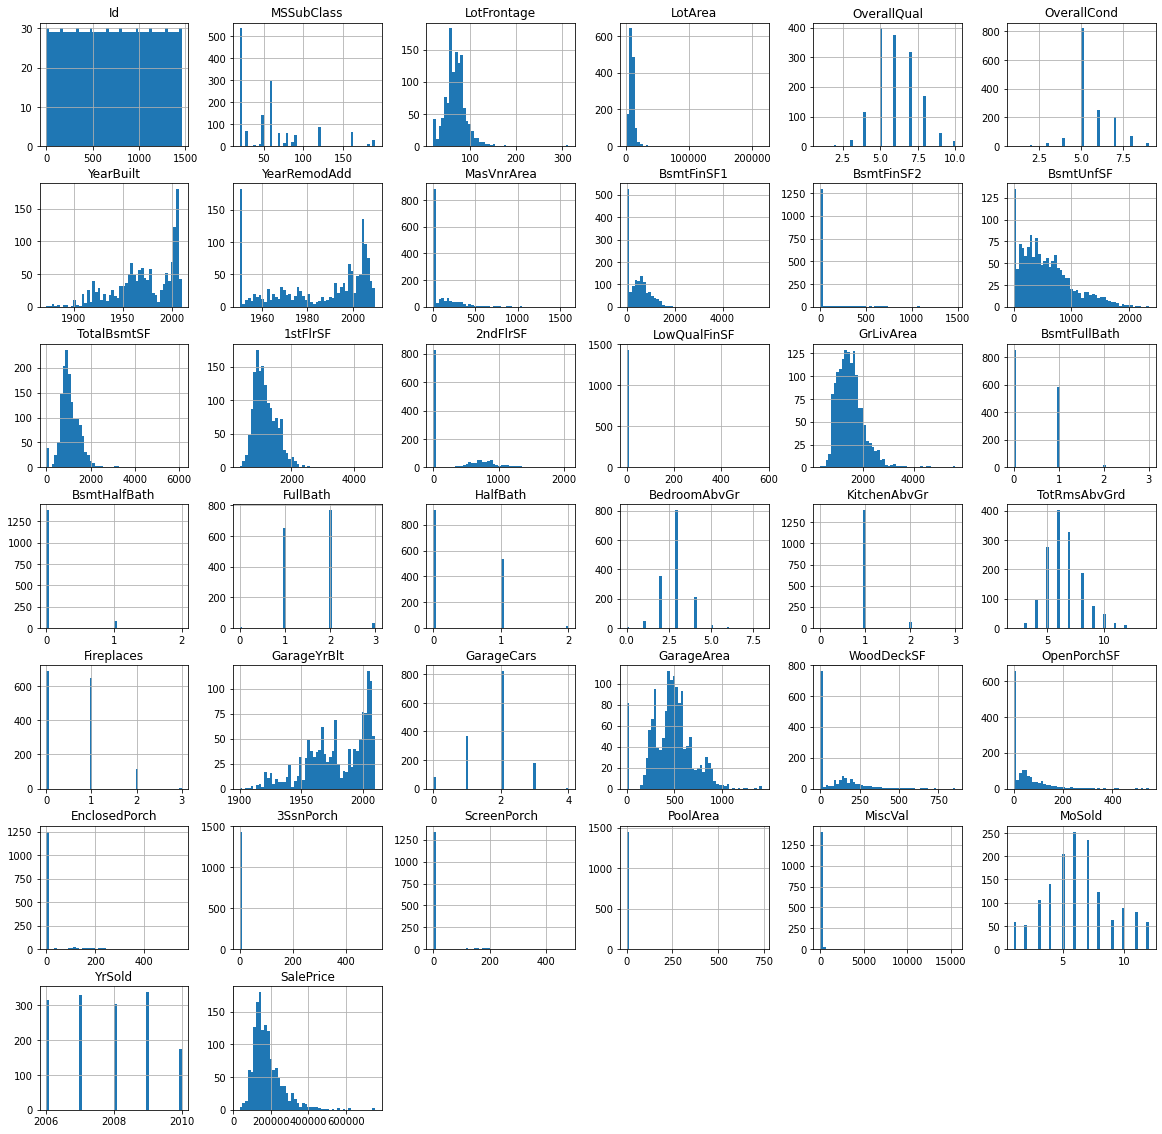

In [16]:
df_train.hist(bins=50, figsize=(20,20))
plt.savefig("attribute_histogram_plots")
plt.show()

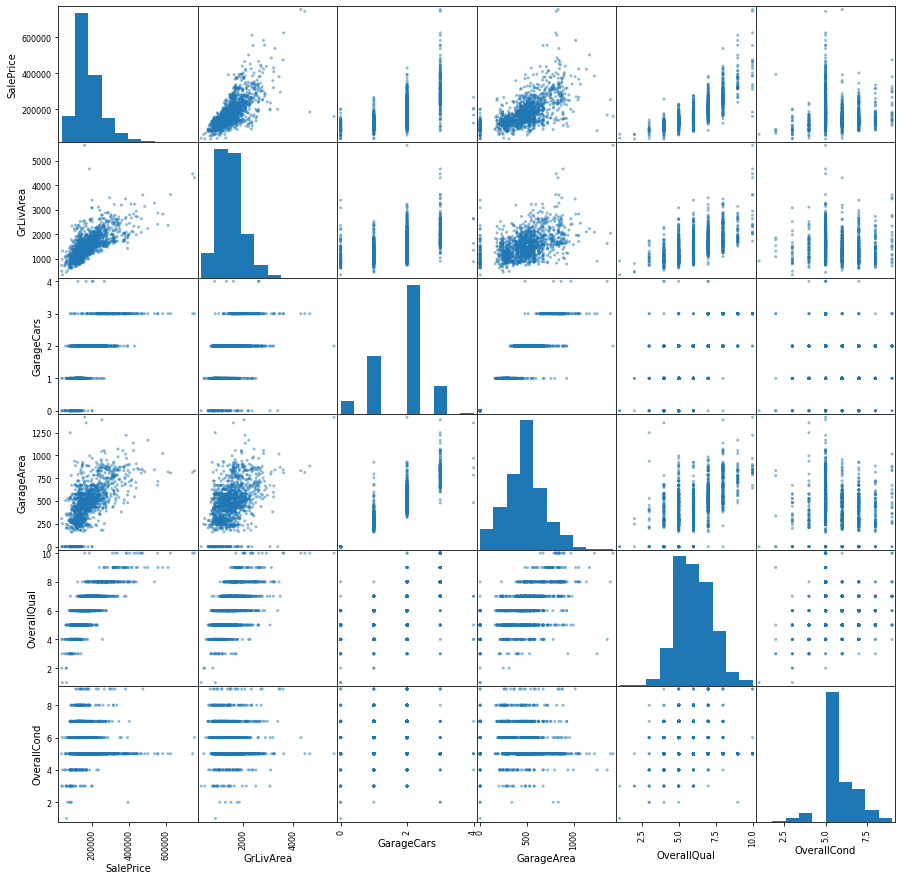

In [29]:
#from pandas.plotting import scatter_matrix
attributes = ['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'OverallQual','OverallCond']
scatter_matrix(df_train[attributes], figsize=(15, 15))
plt.savefig('matrix.png')


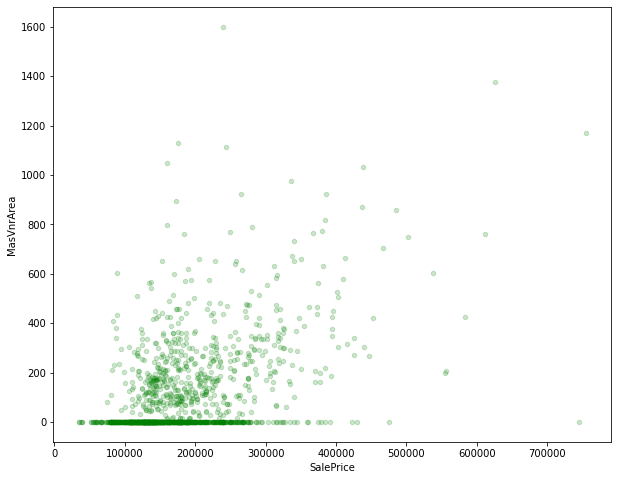

In [30]:
df_train.plot(kind="scatter", x="SalePrice", y="MasVnrArea", alpha=0.2, figsize=(10,8),
    c="green")
plt.savefig('map1.png')

In [31]:
corr_matrix = df_train.corr()                                   #data correlation in regard to SalePrice
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

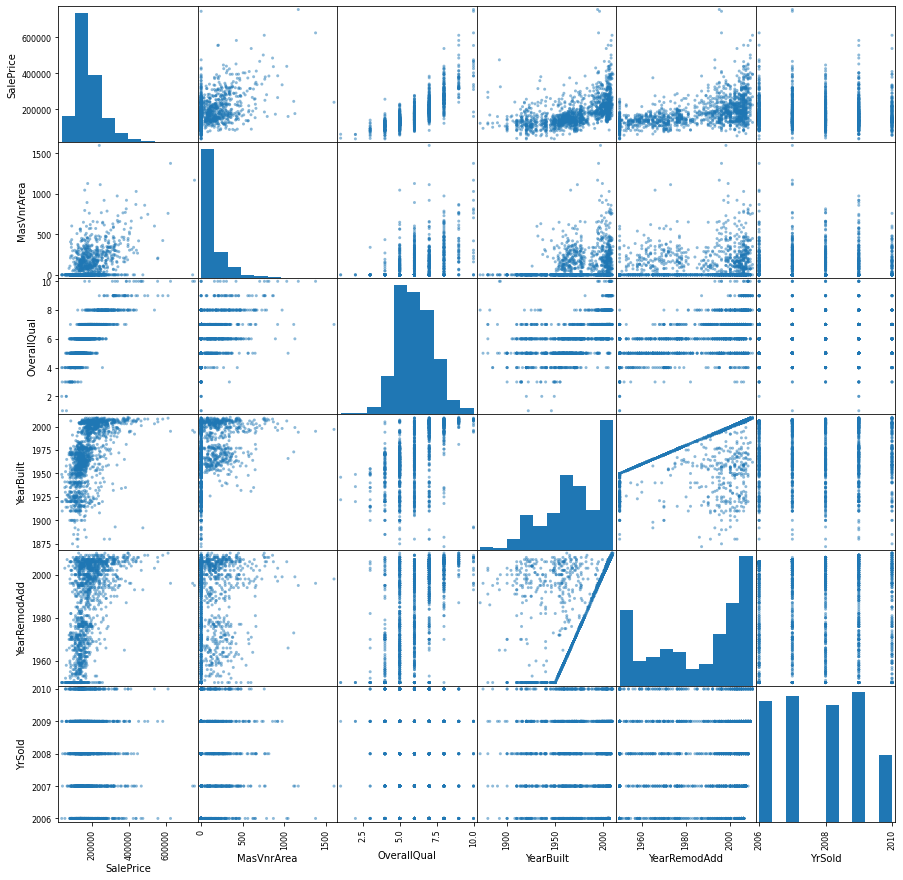

In [33]:
#Visualize correlation
attributes = ["SalePrice", "MasVnrArea", "OverallQual", "YearBuilt","YearRemodAdd", "YrSold"]
scatter_matrix(df_train[attributes], figsize=(15, 15))
plt.savefig('matrix.png')

In [228]:
#preprocessing data
#drop null values
df_train = df_train.select_dtypes(include=[np.number]).interpolate().dropna()
df_test = df_test.select_dtypes(include=[np.number]).interpolate().dropna()



In [229]:
y = np.log(df_train.SalePrice)          #by using the anti-log at some points, the result of the prediction would be sale price; however 
#y=df_train['SalePrice']                  #there are no valuable result for the R squared, RMSE, and MAE.
x = df_train.drop(['SalePrice'], axis=1) # to solve the issue, the program is run by using log to calculate the y value and then 
                                         # use the SalePrice data values by using anti log to do the prediction for sale price

In [230]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=25, test_size=.2)

In [231]:
regressor = LinearRegression()
lin_model=regressor.fit(x_train, y_train)

In [232]:
#calculate R squared
print('R squared: %.3f' % lin_model.score(x_test, y_test))

R squared: 0.899


In [233]:
#calculate RMSE               #by changing random_state can get different rmse, for this model 25 give the closest rmse to the one
y_pred = lin_model.predict(x_test)
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: %.3f' % lin_rmse)

RMSE: 0.131


In [234]:
#calculate mean absolute error(MAE)
lin_mae = mean_absolute_error(y_pred, y_test)
print('MAE: %.3f' % lin_mae)

MAE: 0.097


In [249]:
df_predict=pd.DataFrame({'Sale Price log Prediction':lin_model.predict(x_test)})
df_predict

,Sale Price log Prediction
0,12.599270
1,12.545093
2,12.085277
3,12.508315
4,11.922563
...,...
287,11.983412
288,12.477025
289,11.732844
290,12.513460


In [220]:
#Prediction
predictions_lin = lin_model.predict(x_test)
#predictions_lin

In [236]:
print('Predicted:', [y for y in predictions_lin])
print('Actual:', [y for y in y_test])

Predicted: [12.599270471390428, 12.545092743386538, 12.085277161374206, 12.508314924318286, 11.922563016507219, 12.228072679474147, 12.30149713208933, 12.349069568516432, 12.117882741659457, 12.065332126009885, 12.77734578570174, 11.971017916594041, 12.697147234851132, 12.360258298251491, 12.670321390954618, 11.899940295810865, 11.91841446781387, 11.802748078712154, 11.976298372245255, 12.30676261290301, 11.875791177728352, 12.845855965840498, 12.419433505641244, 12.050326339046281, 11.82389513942885, 11.561773366847492, 11.98191330574978, 12.592619521603503, 12.572421125281084, 11.624888514194685, 12.129048046945346, 12.228053164623681, 11.888854584868277, 12.746537419157786, 12.057009854297291, 12.286289385304206, 12.454175456573697, 11.968736721044875, 11.45518328398357, 11.79905354670752, 12.203315415322685, 12.24784693631755, 12.054455353141146, 11.816619900103085, 12.206251191973525, 12.151936050339915, 12.053784211361739, 12.110384120155587, 11.493114142821796, 12.36154928756902

In [224]:
print('Predicted_log:', [y_anti_log for y_anti_log in predictions_lin])
print('Actual_log:', [y for y in y_test])

Predicted_log: [12.599270471390428, 12.545092743386538, 12.085277161374206, 12.508314924318286, 11.922563016507219, 12.228072679474147, 12.30149713208933, 12.349069568516432, 12.117882741659457, 12.065332126009885, 12.77734578570174, 11.971017916594041, 12.697147234851132, 12.360258298251491, 12.670321390954618, 11.899940295810865, 11.91841446781387, 11.802748078712154, 11.976298372245255, 12.30676261290301, 11.875791177728352, 12.845855965840498, 12.419433505641244, 12.050326339046281, 11.82389513942885, 11.561773366847492, 11.98191330574978, 12.592619521603503, 12.572421125281084, 11.624888514194685, 12.129048046945346, 12.228053164623681, 11.888854584868277, 12.746537419157786, 12.057009854297291, 12.286289385304206, 12.454175456573697, 11.968736721044875, 11.45518328398357, 11.79905354670752, 12.203315415322685, 12.24784693631755, 12.054455353141146, 11.816619900103085, 12.206251191973525, 12.151936050339915, 12.053784211361739, 12.110384120155587, 11.493114142821796, 12.3615492875

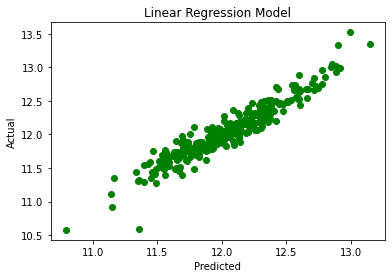

In [143]:
actual = y_test
plt.scatter(predictions_lin, actual, alpha=1,
            color='green') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear Regression Model')
plt.show()

In [242]:
df_prediction = pd.DataFrame()
predictions_lin = lin_model.predict(x_test)
predictions = np.exp(predictions_lin)
df_prediction['Sale Price Predictions'] = predictions
df_prediction


,Sale Price Predictions
0,296342.296237
1,280714.310742
2,177243.037221
3,270577.792661
4,150627.174029
...,...
287,160077.281312
288,262242.494596
289,124597.573159
290,271973.520636


In [246]:
y_test_anti_log=np.exp(y_test)
print('Predicted:', [y_anti_log for y_anti_log in predictions])
print('Actual:', [y for y in y_test_anti_log])

Predicted: [296342.2962372296, 280714.31074174884, 177243.03722143563, 270577.79266090936, 150627.1740285136, 204448.76383389096, 220025.14892338126, 230745.2503258037, 183117.3973399804, 173742.93939223295, 354103.94738777995, 158105.51674223156, 326814.24646473234, 233341.4938179775, 318163.72601681785, 147257.83306857332, 150003.58425314375, 133619.04451788773, 158942.59404134567, 221186.74261441905, 143744.2816048759, 379213.9989866607, 247566.25091642083, 171155.25354493115, 136474.78338417102, 105006.0626343419, 159837.55636356448, 294377.87836886704, 288491.56448452995, 111847.15314909663, 185173.41566130237, 204444.77408576652, 145634.39043082576, 343360.92045782483, 172303.0035220912, 216704.37690307482, 256318.3374399405, 157745.2582074513, 94389.32697003924, 133126.29548051636, 199449.31349211384, 208531.82288441266, 171863.41700156665, 135485.49967448198, 200035.71247674324, 189460.54013425225, 171748.11097973777, 181749.40472607227, 98038.36325348499, 233642.9297272383, 15

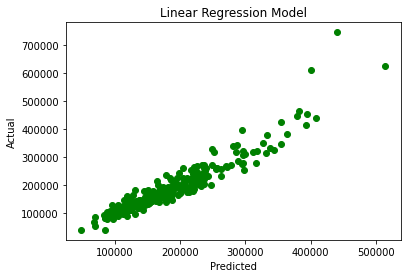

In [248]:
actual = y_test_anti_log
plt.scatter(predictions, actual, alpha=1,
            color='green') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear Regression Model')
plt.show()
